In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from scipy.stats import multivariate_normal
import random

In [2]:
img = plt.imread('lab1.jpg')
a, b, c = img.shape
img.shape

(256, 256, 3)

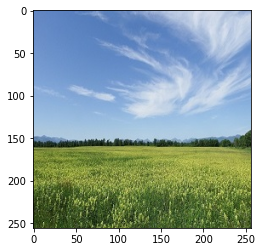

In [3]:
plt.imshow(img)

In [4]:
sample_h = int(0.1*a)
sample_w = int(0.5*b)

In [5]:
img_class1 = img[(a-sample_h):, sample_w:, :]
img_class2 = img[:sample_h, :sample_w, :]

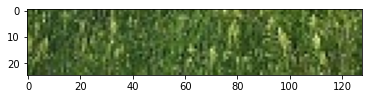

In [6]:
plt.imshow(img_class1)

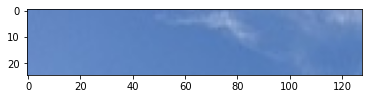

In [7]:
plt.imshow(img_class2)

In [8]:
mean1 = [np.mean(img_class1[:, :, i]) for i in range(c)]
mean2 = [np.mean(img_class2[:, :, i]) for i in range(c)]

In [9]:
img1 = [img_class1[:, :, i].reshape(-1) for i in range(c)]
img2 = [img_class2[:, :, i].reshape(-1) for i in range(c)]

In [10]:
cov1 = np.cov(img1)
cov2 = np.cov(img2)

In [11]:
pdf1 = multivariate_normal(mean=mean1, cov=cov1).pdf(img)
pdf2 = multivariate_normal(mean=mean2, cov=cov2).pdf(img)

In [12]:
A = np.zeros((a, b, c))

In [13]:
for i in range(len(A)):
    for j in range(len(A[i])):
        A[i, j, :] = random.randint(0, 1)

In [14]:
# a = np.where(pdf1<pdf2, 1, 0)

In [15]:
# A[pdf1<pdf2] = 1
# A[pdf1>=pdf2] = 0

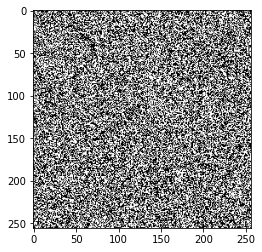

In [16]:
plt.imshow(A)

In [17]:
# def neighbors(a, i, j):
#     nb = []
#     k = 0
#     for n in range(i-1, i+2):
#         for m in range(j-1, j+2):
#             if k % 2 != 0:
#                 if 0 <= n < len(a) and 0 <= m < len(a[0]):
#                     nb.append(a[n][m][1])
#                 else:
#                     continue
#             k+=1
#     return nb

In [18]:
def neighbors1(A, x, y):
    nb = [A[x+b[0], y+b[1], 1] for b in 
                    [(-1,0), (1,0), (0,-1), (0,1)] 
                    if ( (0 <= x+b[0] < len(A)) and (0 <= y+b[1] < len(A[0])))]
    return nb

In [19]:
p_eps1 = np.zeros((a, b))
p_eps2 = np.zeros((a, b))

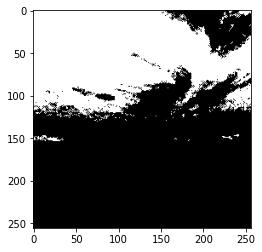

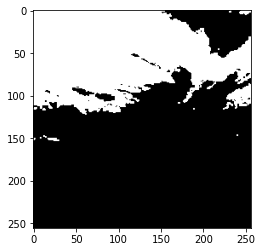

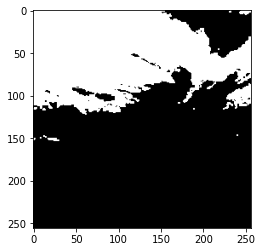

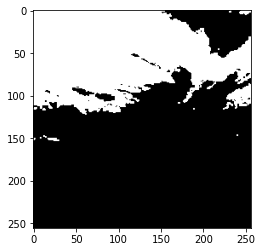

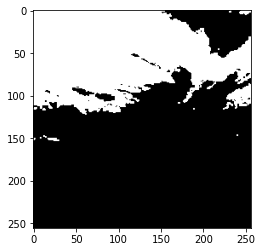

Wall time: 1min 4s


In [20]:
%%time
iters = 100
eps = 0.001
for iter in range(iters):
    for i in range(len(A)):
        for j in range(len(A[i])):
            c_n = neighbors1(A, i, j)
            walrus1, walrus2 = 1, 1
            p_eps1[i, j] = [walrus1 := walrus1*x for x in [(1-eps) if x == 0 else eps for x in c_n]][-1]
            p_eps2[i, j] = [walrus2 := walrus2*x for x in [(1-eps) if x == 1 else eps for x in c_n]][-1]
    pdf1 = pdf1*p_eps1
    pdf2 = pdf2*p_eps2
    pdf1 = pdf1/(pdf1+pdf2)
    pdf2 = pdf2/(pdf1+pdf2)
    #a = np.where(pdf1<pdf2, 1, 0)
    A[pdf1<pdf2] = 1
    A[pdf1>=pdf2] = 0
    if iter % 20 == 0:
        plt.imshow(A)
        plt.show()